In [1]:
import pandas as pd
import numpy as np

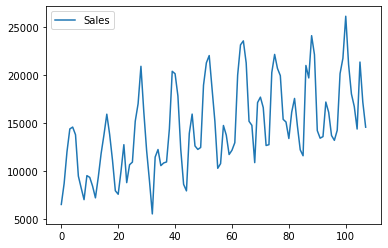

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")

import matplotlib.pyplot as plt

data.plot()
plt.show()

In [7]:
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [9]:
data.dtypes

Month    object
Sales     int64
dtype: object

In [10]:
#Converting obhect months to datetime
data.columns = ["ds","y"]
data["ds"] = pd.to_datetime(data["ds"])
data.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [11]:
train = data.drop(data.index[-12:])
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [12]:
#test values have been droped
from fbprophet import Prophet

mymodel = Prophet()
mymodel.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [13]:
#creating future dates (1968)
future = list()

for i in range(1,13):
    date = "1968-%02d" % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])
future["ds"]

0    1968-01-01
1    1968-02-01
2    1968-03-01
3    1968-04-01
4    1968-05-01
5    1968-06-01
6    1968-07-01
7    1968-08-01
8    1968-09-01
9    1968-10-01
10   1968-11-01
11   1968-12-01
Name: ds, dtype: datetime64[ns]

In [14]:
#predicting
forecast = mymodel.predict(future)

y_test = data["y"][-12:].values
y_pred = forecast["yhat"].values

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [15]:
#metrics R_2 and MSE
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test,y_pred)
print("mse: ",mse)

from sklearn.metrics import r2_score
my_score = r2_score(y_test,y_pred)
print("r2 score: ", my_score)

mse:  1336.8137661823855
r2 score:  0.7816998351995643


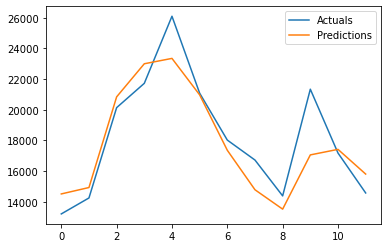

In [16]:
plt.plot(y_test, label="Actuals")
plt.plot(y_pred, label="Predictions")
plt.legend()
plt.show()